In [1]:
#import os
#os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
# The GPU id to use, usually either "0" or "1"
#os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [2]:
import time
start=time.time()

In [3]:
import os
base_dir=('E:/Projects/Kaggle/Cat_dog_classifier')
train_dir=os.path.join(base_dir,'train')
val_dir=os.path.join(base_dir,'validation')
test_dir=os.path.join(base_dir,'test')
train_cat_dir=os.path.join(train_dir,'cats')

In [30]:
train_dir

'E:/Projects/Kaggle/Cat_dog_classifier\\train'

In [4]:
a=['abc']
a=['bcd']
print(a)

z=[]
for i in range(5):
    name='dog.{}.jpg'.format(i)  
    z.append(name)
print(z)

['bcd']
['dog.0.jpg', 'dog.1.jpg', 'dog.2.jpg', 'dog.3.jpg', 'dog.4.jpg']


In [5]:
from keras.preprocessing.image import ImageDataGenerator

train_transform=ImageDataGenerator(rescale=1./255, rotation_range=40,width_shift_range=0.2,
                                  height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,
                                  fill_mode='nearest')

test_transform=ImageDataGenerator(rescale=1./255)
train_loader=train_transform.flow_from_directory(train_dir, target_size=(150,150),batch_size=20,
                                                class_mode='binary',color_mode='rgb')

validation_loader=test_transform.flow_from_directory(val_dir,target_size=(150,150),batch_size=20,
                                                class_mode='binary',color_mode='rgb')

test_loader=test_transform.flow_from_directory(test_dir,target_size=(150,150),batch_size=20,
                                                class_mode='binary',color_mode='rgb')

Using TensorFlow backend.


Found 4000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [6]:
#instantiating pretrained network

from keras.applications import VGG16

conv_base=VGG16(weights='imagenet',include_top=False,input_shape=(150,150,3))
conv_base.summary() 

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
bloc

In [7]:
#Fune Tunning:

conv_base.trainable=True


for layer in conv_base.layers:
    if layer.name=='block5_conv1' or layer.name== 'block4_conv1':
        layer.trainable=True
    else:
        layer.trainable=False
conv_base.summary() 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [8]:
#Build the model

from keras import layers
from keras import models
from keras.layers import Dense, Dropout, Flatten #is much easier
#model.add(Dense(512,activation='relu'))


model=models.Sequential()
model.add(conv_base)# you already specific the input_shape is 150,150,3

model.add(layers.Flatten())
#model.add(layers.Dropout(0.2))
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(32,activation='relu'))
#model.add(layers.Dropout(0.1))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(8,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
# 512 and 1 is the output dimension

In [9]:
#configure model for training (optimizer)

from keras import optimizers
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-5),
             metrics=['acc'])

In [10]:
#Fit the model using batch generator

classifier=model.fit_generator(train_loader,
                           steps_per_epoch=200,epochs=30,
                           validation_data=validation_loader,
                            validation_steps=50)

Instructions for updating:
Use tf.cast instead.
Epoch 1/30
200/200 [==============================] - 50s 251ms/step - loss: 0.5510 - acc: 0.7325 - val_loss: 0.3163 - val_acc: 0.8670
Epoch 2/30
200/200 [==============================] - 29s 143ms/step - loss: 0.3242 - acc: 0.8635 - val_loss: 0.2090 - val_acc: 0.9120
Epoch 3/30
200/200 [==============================] - 29s 143ms/step - loss: 0.2673 - acc: 0.8877 - val_loss: 0.1846 - val_acc: 0.9250
Epoch 4/30
200/200 [==============================] - 28s 142ms/step - loss: 0.2435 - acc: 0.8997 - val_loss: 0.1616 - val_acc: 0.9310
Epoch 5/30
200/200 [==============================] - 28s 142ms/step - loss: 0.2222 - acc: 0.9030 - val_loss: 0.1513 - val_acc: 0.9420
Epoch 6/30
200/200 [==============================] - 28s 142ms/step - loss: 0.2013 - acc: 0.9182 - val_loss: 0.1930 - val_acc: 0.9230
Epoch 7/30
200/200 [==============================] - 29s 143ms/step - loss: 0.1914 - acc: 0.9225 - val_loss: 0.1739 - val_acc: 0.9310
Epoch 8

In [11]:
#You can save the model 
model.save('cats_and_dogs_classifier_v1.h5')

end=time.time()
print('The training took {} second'.format(end-start))

The training took 886.5822756290436 second


In [12]:
abc=classifier.history['acc']
print(abc)
print(len(abc))

[0.7325000017881393, 0.863500000834465, 0.8877499973773957, 0.8997499960660934, 0.9029999941587448, 0.9182499945163727, 0.9224999943375587, 0.9269999918341637, 0.9349999898672103, 0.9377499923110009, 0.9424999922513961, 0.9417499932646751, 0.9472499939799309, 0.9477499917149543, 0.9574999922513961, 0.9542499920725822, 0.9529999932646751, 0.9567499926686287, 0.9567499935626984, 0.9642499935626984, 0.966999993622303, 0.9677499940991402, 0.9677499943971634, 0.9622499930858612, 0.9669999939203262, 0.9694999942183494, 0.9662499940395355, 0.972999994456768, 0.9744999945163727, 0.9682499948143959]
30


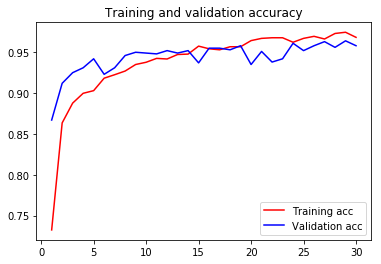

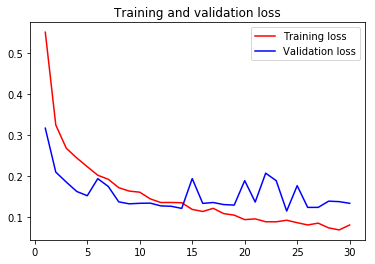

In [21]:
#Display curve of loss and accuracy during training

import matplotlib.pyplot as plt

acc=classifier.history['acc']
val_acc=classifier.history['val_acc']
loss=classifier.history['loss']
val_loss=classifier.history['val_loss']

epochs=range(1,len(acc)+1)

plt.plot(epochs,acc,'r',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs,loss,'r',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

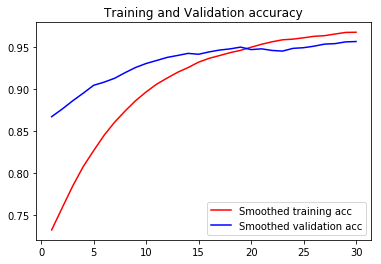

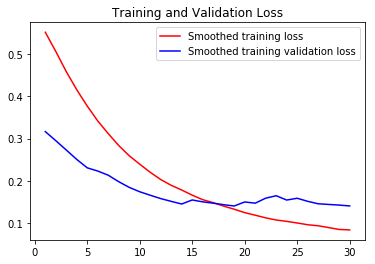

In [14]:
#To smoothing the plot for nicer visualization

def smooth_curve(points,factor=0.8):
    smoothed_points=[]
    for point in points:
        if smoothed_points:
            previous=smoothed_points[-1]
            smoothed_points.append(previous*factor+point*(1-factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

plt.plot(epochs, smooth_curve(acc),'r',label='Smoothed training acc')
plt.plot(epochs, smooth_curve(val_acc),'b',label='Smoothed validation acc')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, smooth_curve(loss),'r',label='Smoothed training loss')
plt.plot(epochs, smooth_curve(val_loss),'b',label='Smoothed training validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

In [15]:
test_loss,test_acc=model.evaluate_generator(test_loader,steps=50)

print('test loss:', test_loss)
print('test acc:', test_acc)

test loss: 0.14958373168134131
test acc: 0.9519999921321869


In [16]:
#Display random augmentation of an img

from keras.preprocessing import image
fnames=[os.path.join(train_cat_dir,fname)for fname in os.listdir(train_cat_dir)]
# os.listdir(path)returns a list containing the names of the entries in the directory given by path

import random
img_path=random.choice(fnames)
img=image.load_img(img_path, target_size=(150,150))
#read the img and resize it
print('img here is',type(img))

img_np=image.img_to_array(img)
#convert the img into np array = tensor
img_np_type=type(img_np)
print('img here is',type(img_np),'It has a shape of',img_np.shape)

img_np=img_np.reshape((1,)+img_np.shape)
print('img here is',type(img_np),'It has a shape of',img_np.shape)

img here is <class 'PIL.Image.Image'>
img here is <class 'numpy.ndarray'> It has a shape of (150, 150, 3)
img here is <class 'numpy.ndarray'> It has a shape of (1, 150, 150, 3)


batch is <class 'numpy.ndarray'> have shape (1, 150, 150, 3)
batch[0] is <class 'numpy.ndarray'> have shape (150, 150, 3)


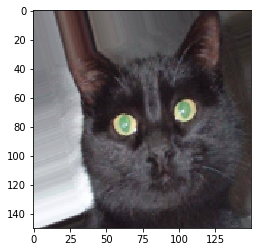

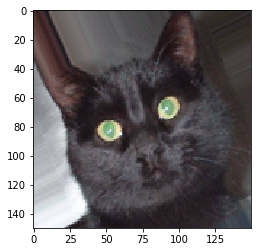

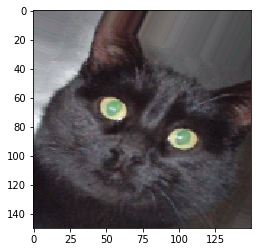

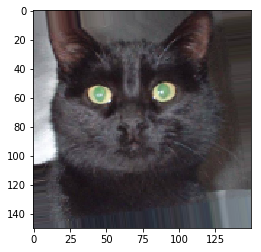

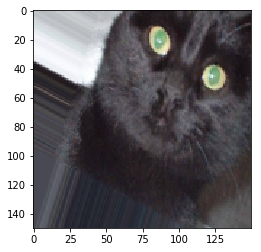

In [17]:
i=0
for batch in train_transform.flow(img_np, batch_size=1):
   # print('batch is', type(batch),'have shape',(batch.shape))# it is np img
    plt.figure()
    imgplot=plt.imshow(batch[0])
   
    i+=1
    if i%5==0:
        break
print('batch is', type(batch),'have shape',(batch.shape))# it is np img
print('batch[0] is', type(batch),'have shape',(batch[0].shape))# it is np img

plt.show()

img_tensor is <class 'numpy.ndarray'> dimension is (1, 150, 150, 3)
img_tensor[0] have shape (150, 150, 3)


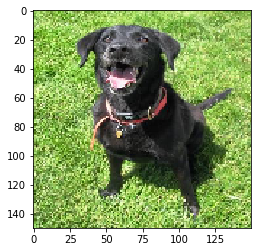

In [29]:
#if want to feed an img to predict
#we should also standardize the testing file

from keras.preprocessing import image

img_path=('E:/Projects/Kaggle/Cat_dog_classifier/test/dogs/dog.2513.jpg')
img=image.load_img(img_path,target_size=(150,150))
plt.imshow(img)

img_tensor=image.img_to_array(img)
img_tensor=img_tensor.reshape((1,)+img_tensor.shape)

print('img_tensor is',type(img_tensor),'dimension is',img_tensor.shape)
print('img_tensor[0] have shape',img_tensor[0].shape)

In [19]:
#create mapping

label_map = (train_loader.class_indices)
print(label_map)

#reverse the mapping
mapping={}
for i,j in label_map.items():
    mapping[j]=i
    
print(mapping)

{'cats': 0, 'dogs': 1}
{0: 'cats', 1: 'dogs'}


In [20]:
ypred=model.predict(img_tensor)

import numpy as np

ypred_scalar= np.asscalar(ypred)

print('The pet is a {}'.format(mapping[ypred_scalar]))

#OR 

scalar=ypred.item()
print('The pet is a {}'.format(mapping[scalar]))


The pet is a dogs
The pet is a dogs
